In [82]:
import transform
import numpy as np
import matplotlib.pyplot as plt
import torch

# image_path = '/media/cellverse/share013/zhoushch/cryoDuster/data/cryobench/11629428/IgG-1D/images/snr0.01/particle_stack.npy'
image_path = '/media/cellverse/share013/zhoushch/cryoDuster/data/N1_proj50000_snrNone_single/1xvi/particle_stack.npy'
images = np.load(image_path)
image = images[0]

pose = None
views = [{"img": images[i].reshape(1, *images[i].shape), "pose": pose} for i in range(2)]

(128, 128)
<class 'numpy.ndarray'>
float32


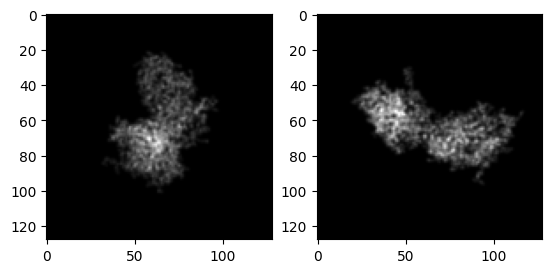

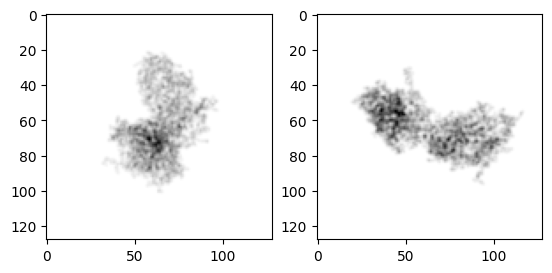

In [83]:
print(image.shape)
print(type(image))
print(image.dtype)

# show images in subplots
fig, axs = plt.subplots(1, len(views))
for i, view in enumerate(views):
    img = view["img"].reshape(*view["img"].shape[1:])
    axs[i].imshow(img, cmap='gray')

# inverse color
fig, axs = plt.subplots(1, len(views))
for i, view in enumerate(views):
    img = view["img"].reshape(*view["img"].shape[1:])
    # inverse color of image
    img = 255 - img
    axs[i].imshow(img, cmap='gray')

(128, 128)
(128, 128)


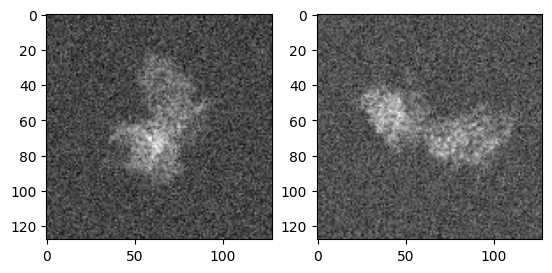

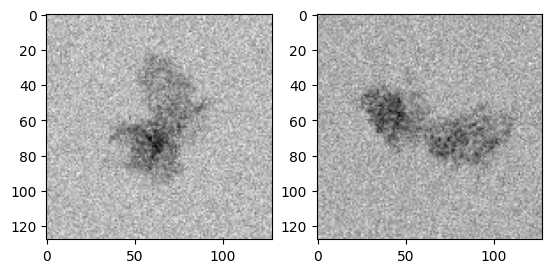

In [84]:
import os, sys
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname(sys.argv[0]), '..', '..')))
from ctf import generate_random_ctf_params, compute_ctf, compute_safe_freqs
from utils import fft2_center, ifft2_center

for view in views:
    # view['img']: 1 * w * h
    image = view['img'].reshape(view["img"].shape[1:]) # w * h

    # apply ctf
    # sidelen, apix = 128, 1.0
    # batch = 1
    # ctf_params = generate_random_ctf_params(batch)
    # freqs_mag, angles_rad = compute_safe_freqs(sidelen, apix)
    # ctf = compute_ctf(freqs_mag, angles_rad, *ctf_params).reshape(batch, sidelen, sidelen)
    # ctf_corrupted_fourier_images = ctf * fft2_center(image)
    # image = ifft2_center(ctf_corrupted_fourier_images).real # 1 * w * h

    # add noise
    sidelen, apix = 128, 1.0
    snr = 1.0
    # 1 * w * h or w * h are both ok
    noise_std = np.sqrt(np.var(image, axis=(-2, -1), keepdims=True) / snr)
    expand_noise_std = np.tile(noise_std, (1, sidelen, sidelen))
    image = np.random.normal(image, expand_noise_std)

    view['img'] = image


fig, axs = plt.subplots(1, len(views))
for i, view in enumerate(views):
    img = view["img"].reshape(view["img"].shape[1:])
    print(img.shape)
    axs[i].imshow(img, cmap='gray')

fig, axs = plt.subplots(1, len(views))
for i, view in enumerate(views):
    img = view["img"].reshape(*view["img"].shape[1:])
    # inverse color of image
    img = 255 - img
    axs[i].imshow(img, cmap='gray')

shift = tensor([0, 4])
shift = tensor([-5,  6])


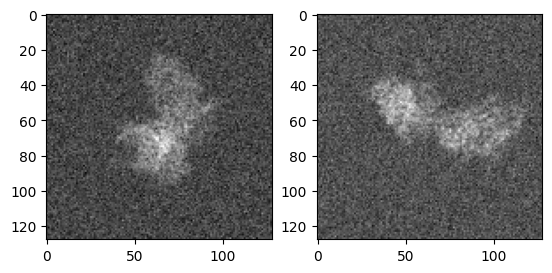

In [87]:
# add shift
for i, view in enumerate(views):
    image = torch.tensor(view["img"]) # 1 * w * h
    # randomly shift image in x and y direction within 10 pixels in positive and negative direction
    shift = torch.randint(-10, 10, (2,))
    image = torch.roll(image, shifts=shift.tolist(), dims=(1, 2))

    print(f'{shift = }')
    view['img'] = image # 1 * w * h

fig, axs = plt.subplots(1, len(views))
for i, view in enumerate(views):
    img = view["img"].reshape(view["img"].shape[1:])
    axs[i].imshow(img, cmap='gray')


In [89]:
a = torch.zeros(1, 3)
a

tensor([[0., 0., 0.]])